In [3]:
import numpy as np
import time
import cv2 as cv
import matplotlib.pyplot as plt

In [4]:
plt.ion()
plt.rcParams['image.cmap']='gray'

# Image Classification using OpenCV DNN Module

In [5]:
model_weights='./models/DenseNet-Caffe/DenseNet_121.caffemodel'
model_architecture='./models/DenseNet-Caffe/DenseNet_121.prototxt'
model=cv.dnn.readNetFromCaffe(model_architecture,model_weights)
labels='./models/DenseNet-Caffe/classification_classes_ILSVRC2012.txt'
with open(labels,'r') as f:
    class_names_=f.read().split('\n')

In [6]:
class_names_[:4]

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri']

In [7]:
len(class_names_)

1001

In [8]:
class_names=[names.split(',')[0] for names in class_names_]

In [9]:
print(class_names[:9])

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen']


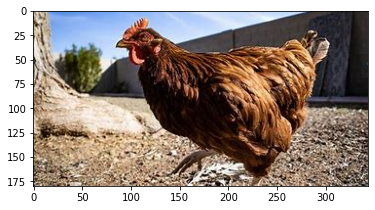

In [10]:
img=cv.imread('../images/hen.jpg')
plt.imshow(img[:,:,::-1])

In [11]:
# preparing the image that will be used as input to the model
blob=cv.dnn.blobFromImage(image=img,scalefactor=(1.0/127.5),size=(224,224),mean=(127.5,127.5,127.5),swapRB=True)
## setting up the blob image as the input to the network.
model.setInput(blob)

In [12]:
#Forward Propagate the Input Through the Model
output=model.forward()
output.shape

(1, 1000, 1, 1)

In [13]:
output[0][:4]

array([[[ 0.16756552]],

       [[ 0.6008549 ]],

       [[-2.5878062 ]],

       [[-2.3339162 ]]], dtype=float32)

The outputs is an array which is a set of scores for each class but we need Probabilities between 0-1 for each class so we need to preprocess the output and apply the softmax function on the scores to get the correct scores.

In [14]:
# reshape the output into 1D
output_final=np.reshape(output,(1000,1))
# index of the predicted output
label_id=np.argmax(output_final)
# softmax
softmax_prob=np.exp(output_final)/np.sum(np.exp(output_final))

In [15]:
output_final.shape,softmax_prob[:4]

((1000, 1),
 array([[1.0236564e-06],
        [1.5788082e-06],
        [6.5089587e-08],
        [8.3902435e-08]], dtype=float32))

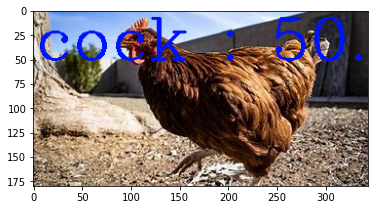

In [16]:
score=np.max(softmax_prob)
score=np.round(score,2)    
label_name=class_names[label_id]
out=cv.putText(img, label_name+" : "+ str(score *100), (2,50),  cv.FONT_HERSHEY_COMPLEX,2,(250, 20,0), 2)
plt.imshow(out[:,:,::-1])

In [17]:
def image_classifier(img,class_names,model):
    blob=cv.dnn.blobFromImage(image=img,scalefactor=(1.0/127.5),size=(224,224),mean=(127.5,127.5,127.5),swapRB=True)
    ## setting up the blob image as the input to the network.
    model.setInput(blob)
    #Forward Propagate the Input Through the Model
    output=model.forward()
    #The outputs is an array which is a set of scores for each class but we need Probabilities between 0-1 for each class. 
    #we need to preprocess the output and apply the softmax function on the scores to get the correct scores.
    # turn the output to 1D
    output_final=np.reshape(output,(1000,1))
    label_id=np.argmax(output_final)
    softmax_prob=np.exp(output_final)/np.sum(np.exp(output_final))
    score=np.round(np.max(softmax_prob),2)
    label_name=class_names[label_id]
    cv.putText(img, label_name+":"+str(score *100), (2,50),  cv.FONT_HERSHEY_COMPLEX,2,(250, 20, 0), 2)
    return plt.imshow(img[:,:,::-1])

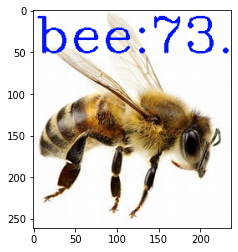

In [18]:
img=cv.imread('../images/bee.jpg')
image_classifier(img,class_names,model)

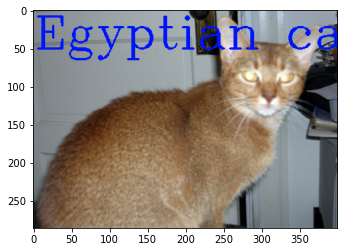

In [19]:
img=cv.imread('../images/cat.jpg')
image_classifier(img,class_names,model)

# Object Detection using OpenCV DNN

In [20]:
# model weights file
weights_frozen='./models/ssm3/frozen_inference_graph.pb' 
# The model configuration (neural network architecture file)
config_file='./models/ssm3/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
labels='./models/ssm3/coco_labels.txt'
object_model=cv.dnn.readNetFromTensorflow(weights_frozen,config_file)

In [21]:
with open(labels,'r') as f:
    object_names=f.read().split('\n')

In [22]:
print(object_names)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


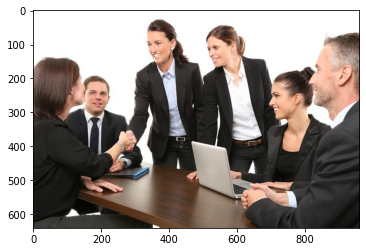

In [23]:
img = cv.imread('../images/people.jpg')
plt.imshow(img[:,:,::-1])

In [24]:
blob=cv.dnn.blobFromImage(image=img,scalefactor=(1.0/127.5),size=(320,320),mean=(127.5,127.5,127.5),swapRB=True)
object_model.setInput(blob)
objects_detected=object_model.forward()
objects_detected.shape

(1, 1, 100, 7)

In [25]:
COLORS=np.random.uniform(0,255,size=(len(class_names),3))

In [26]:
img = cv.imread('../images/people.jpg')
img_h,img_w,_=img.shape
for object_detected in objects_detected[0,0,:,:]:
    score=object_detected[2]
    if score>=.5:
        class_id=object_detected[1]
        label_name=object_names[int(class_id)-1]
        colors=COLORS[int(class_id)]
        x_min=int(object_detected[3]*img_w)
        y_min=int(object_detected[4]*img_h)
        x_max=int(object_detected[5]*img_w)
        y_max=int(object_detected[6]*img_h)
        cv.rectangle(img,(x_min,y_min),(x_max,y_max),colors,1)
        cv.putText(img,label_name,(x_min+5,y_min+40),cv.FONT_HERSHEY_SIMPLEX,1,colors,1)
        
cv.imshow('detected_objects',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [29]:
def object_detection_img(img,model,obj_names=object_names,thickness=1):
    plt.figure(figsize=(20,10))
    img_h,img_w=img.shape[:2]
    COLORS=np.random.uniform(0,255,size=(len(obj_names),3))
    blob=cv.dnn.blobFromImage(image=img,scalefactor=(1.0/127.5),size=(320,320),mean=(127.5,127.5,127.5),swapRB=True)
    model.setInput(blob)
    detected_obj=model.forward()
    for obj_detected in detected_obj[0,0,:,:]:
        score=obj_detected[2]
        score=np.round(score,2)
        if score>=0.5:
            classId=int(obj_detected[1])
            obj_name=obj_names[int(classId)-1]
            colors=COLORS[classId]
            x_min=int(obj_detected[3]*img_w)
            y_min=int(obj_detected[4]*img_h)
            x_max=int(obj_detected[5]*img_w)
            y_max=int(obj_detected[6]*img_h)
            out=cv.rectangle(img,(x_min,y_min),(x_max,y_max),colors,2)
            out=cv.putText(out,obj_name+":"+str(score),(x_min+5,y_min+40),cv.FONT_HERSHEY_COMPLEX,1,colors,thickness)
    return plt.imshow(out[:,:,::-1])
            

In [30]:
# model weights file
weights_frozen='./models/ssm3/frozen_inference_graph.pb' 
# The model configuration (neural network architecture file)
config_file='./models/ssm3/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
labels='./models/ssm3/coco_labels.txt'
object_model1=cv.dnn.readNetFromTensorflow(weights_frozen,config_file)

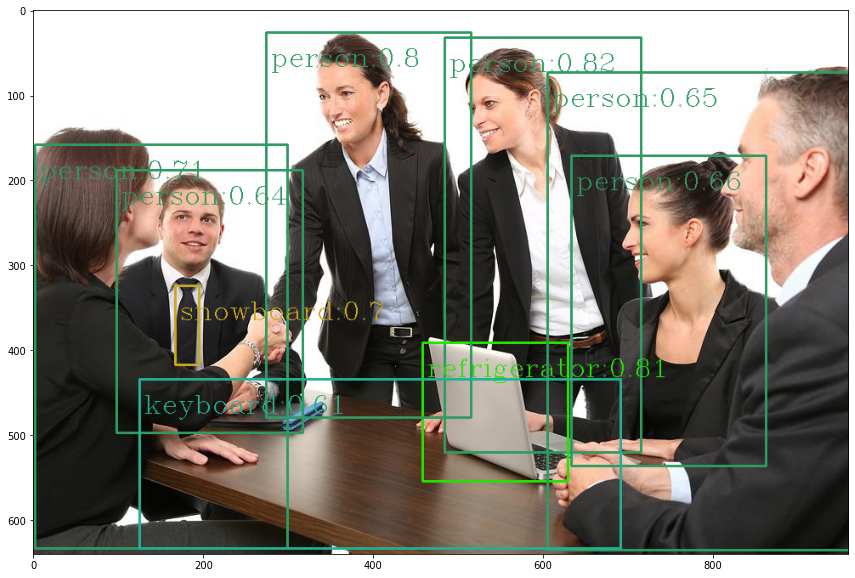

In [31]:
img = cv.imread('../images/people.jpg')
object_detection_img(img,object_model1)

In [32]:
img = cv.imread('../images/car.jpg')
object_detection_img(img,object_model1,thickness=5)

AttributeError: 'NoneType' object has no attribute 'shape'

<Figure size 1440x720 with 0 Axes>

In [34]:
b='../images/davido.mp4'
#camera=cv.VideoCapture(0)
cap=cv.VideoCapture(b)
frame_w=int(cap.get(3))
frame_h=int(cap.get(4))
fontScale=1
fourcc=cv.VideoWriter_fourcc(*'XVID')
#fourcc=cv.VideoWriter_fourcc(*'mp4v')

#output_avi=cv2.VideoWriter('./video/bayer.avi',fourcc,48,(frame_width,frame_height))
output_mp4=cv.VideoWriter('../images/dd.mp4',fourcc,24,(frame_w,frame_h))

win_name='detector'
cv.namedWindow(win_name,cv.WINDOW_AUTOSIZE)

while cap.isOpened():
    has_frame,frame=cap.read()
    if has_frame==True:
        
        img=frame
        img_h,img_w=img.shape[:2]
        COLORS=np.random.uniform(0,255,size=(len(object_names),3))
        blob=cv.dnn.blobFromImage(image=img,scalefactor=(1.0/127.5),size=(320,320),mean=(127.5,127.5,127.5),swapRB=True)
        start=time.time()
        object_model1.setInput(blob)
        detected_obj=object_model1.forward()
        end=time.time()
        fps=1/(end-start)
        for obj_detected in detected_obj[0,0,:,:]:
            score=obj_detected[2]
            score=np.round(score,2)
            if score>=0.5:
                classId=int(obj_detected[1])
                obj_name=object_names[int(classId)-1]
                colors=COLORS[classId]
                x_min=int(obj_detected[3]*img_w)
                y_min=int(obj_detected[4]*img_h)
                x_max=int(obj_detected[5]*img_w)
                y_max=int(obj_detected[6]*img_h)
                cv.rectangle(img,(x_min,y_min),(x_max,y_max),colors,1)
                cv.putText(img,obj_name+":"+str(score),(x_min,y_min+20),cv.FONT_HERSHEY_COMPLEX,1,colors,1)
                cv.putText(img, f"{fps:.2f} FPS",(x_min,y_min-10),cv.FONT_HERSHEY_COMPLEX,1,colors,1)
                output_mp4.write(frame)
        cv.imshow(win_name,frame)
        key=cv.waitKey(24)
        if key==ord('Q') or key==ord('q') or key==27:
            break
    
output_mp4.release()
cap.release()
cv.destroyAllWindows()


# ANOTHER WAY OF DETECTING OBJECT

In [35]:
weights_frozen='./models/ssm3/frozen_inference_graph.pb' 
# The model configuration (neural network architecture file)
config_file='./models/ssm3/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
labels='./models/ssm3/coco_labels.txt'
model=cv.dnn_DetectionModel(weights_frozen,config_file)

In [36]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True) # swarp the red and blue compnent

<dnn_Model 0000015657C6CAB0>

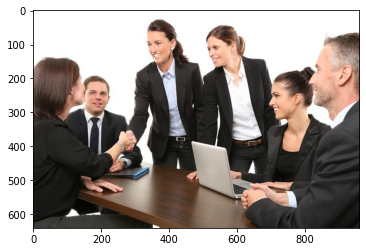

In [37]:
img = cv.imread('../images/people.jpg')
plt.imshow(img[:,:,::-1])

In [38]:
Classindx,confidence,bboxes=model.detect(img,confThreshold=0.6)

In [39]:
for i,name in enumerate(object_names):
    i=i+1
    for j in Classindx:
        if i==j:
            print(name)
#classindx[1]==18

person
person
person
person
person
person
snowboard
keyboard
refrigerator


In [40]:
def detector(img,fontScale=1,thickness=1):
    plt.figure(figsize=(20,10))
    Classindx,confidence,bboxes=model.detect(img,confThreshold=0.5)
    for classind,score,bbox in zip(Classindx.flatten(),confidence.flatten(),bboxes):
        cv.rectangle(img,bbox,COLORS[int(classind)],thickness)
        cv.putText(img,object_names[classind-1].upper()+" :"+ str(np.round(score,2)),(bbox[0]+5,bbox[1]+20),
                    cv.FONT_HERSHEY_COMPLEX,fontScale,COLORS[int(classind)],1)
    return plt.imshow(img[:,:,::-1])
    

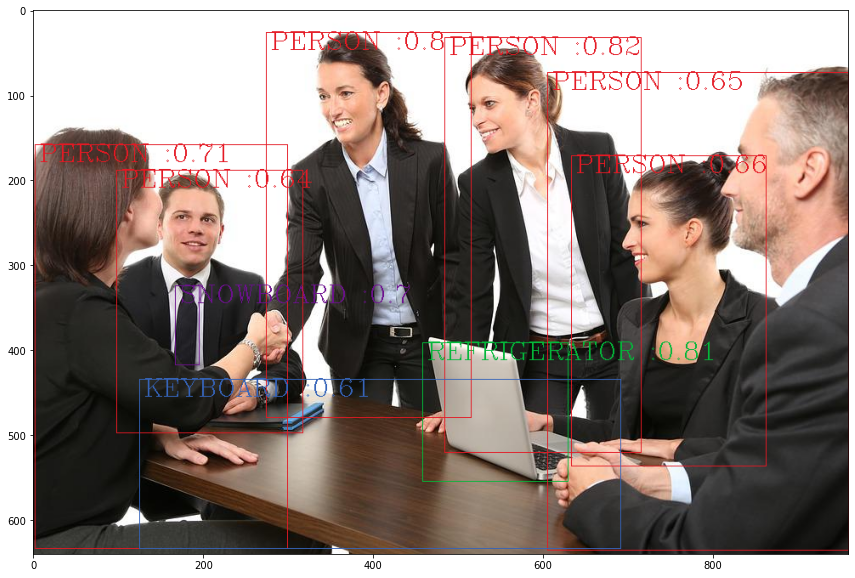

In [41]:
img = cv.imread('../images/people.jpg')
detector(img)

In [42]:
win_name='detector'
cv.namedWindow(win_name,cv.WINDOW_AUTOSIZE)
bayern='../images/davido.mp4'
#camera=cv2.VideoCapture(0)
camera=cv.VideoCapture(bayern)
camera.set(3,640)
camera.set(4,480)
fontScale=1
while True:
    ret ,frame=camera.read()
    ClassIds,confidence,bboxes=model.detect(frame,confThreshold=0.5)
    
    if len(ClassIds)!=0:
        for classId,confi,box in zip(ClassIds.flatten(),confidence.flatten(),bboxes):
            print(box)
            if (classId<=80):
                cv.rectangle(frame,box,COLORS[int(classId)],1)
                cv.putText(frame,object_names[classId-1],(box[0]+10,box[1]+30),cv.FONT_HERSHEY_COMPLEX,fontScale,
                            COLORS[int(classId)],)

       
    cv.imshow(win_name,frame)
    key=cv.waitKey(24)
    if key==ord('Q') or key==ord('q') or key==27:
            break
    
camera.release()
cv.destroyAllWindows()


[460 144  68 106]
[445  68  78 117]
[ 85 156  70 101]
[ 85 109  68 122]
[457  75  71 156]
[230 160  99  98]
[185 136  64 123]
[353 164  48  45]
[396 170  18  40]
[415 158  22  61]
[321 160  30  51]
[103 138  72 112]
[144 138  51  97]
[415 143  24  61]
[194 142  84 118]
[459 139  67 105]
[449 144  60  99]
[458 144  73 109]
[445  71  84 119]
[ 83 155  70 107]
[456  92  73 153]
[ 81 114  72 121]
[ 94 149  85 113]
[230 165  96  94]
[355 166  42  46]
[186 139  62 121]
[321 162  29  51]
[413 155  24  64]
[195 145  77 114]
[144 136  50 100]
[185 124  65 109]
[394 168  19  45]
[252 114  82 116]
[458 149  69 105]
[ 85 160  64 104]
[448  72  78 141]
[101 157  72 106]
[ 80 118  71 115]
[228 167  98  96]
[351 170  49  43]
[457 137  69 109]
[199 150  73 112]
[189 147  58 116]
[412 147  27  60]
[320 165  26  47]
[458 148  71 107]
[ 82 158  72 110]
[456  90  73 153]
[101 157  74 109]
[ 81 117  71 123]
[229 155 100 109]
[446  75  82 115]
[353 171  45  46]
[187 148  61 118]
[414 157  25  63]
[240 123  

[ 77 169  76 108]
[460 154  77 116]
[453  70  81 154]
[222 166 106 112]
[ 78 130  71 138]
[181 142  65 126]
[192 157 109 121]
[457 108  80 153]
[ 97 127  40  55]
[244 125  73  94]
[411 164  27  55]
[184 134  63 121]
[307 165  51 113]
[323 172  23  41]
[396 163  30  62]
[258 129  45  56]
[110 154  63 112]
[ 76 168  74 109]
[462 156  76 114]
[453  69  82 156]
[222 170 105 108]
[ 76 130  73 139]
[183 153  60 126]
[190 159 116 120]
[ 97 128  39  54]
[458 113  80 149]
[242 125  75  93]
[349 180  48  46]
[396 162  30  64]
[184 133  63 120]
[417 166  21  52]
[257 129  46  57]
[307 164  53 114]
[197 129  41  55]
[235 132  85 127]
[395 175  30  62]
[ 75 166  76 111]
[462 157  75 113]
[454  70  80 149]
[222 172 102 106]
[ 76 132  73 135]
[350 180  47  46]
[183 153  60 127]
[190 161 113 118]
[ 95 129  41  55]
[458 117  78 144]
[184 132  63 120]
[240 125  75  90]
[395 176  27  61]
[197 129  41  56]
[257 129  46  57]
[112 156  65 111]
[235 134  83 124]
[142 156  51  97]
[395 176  27  61]
[ 75 169  